In [1]:
import os 
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir("D:/credit suisse")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import lfilter

In [4]:
df1=pd.read_csv('WIPRO.NS.csv')
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-04-04,223.500000,225.875000,220.750000,222.550003,190.965378,3264100.0
1,2013-04-05,220.750000,231.500000,219.375000,227.300003,195.041260,3615068.0
2,2013-04-08,225.750000,228.000000,214.774994,224.399994,192.552811,12271312.0
3,2013-04-09,203.500000,209.000000,195.125000,196.850006,168.912750,14171642.0
4,2013-04-10,197.550003,202.399994,197.550003,201.125000,172.581055,4875874.0
5,2013-04-11,203.699997,204.000000,199.500000,201.475006,172.881393,2561134.0
6,2013-04-12,194.949997,195.000000,189.524994,191.899994,164.665268,7752650.0
7,2013-04-15,191.949997,196.324997,188.149994,189.550003,162.648788,3153160.0
8,2013-04-16,189.250000,191.550003,188.350006,190.675003,163.614151,1374018.0
9,2013-04-17,192.500000,192.725006,185.600006,187.274994,160.696655,2272992.0


In [5]:
df1.shape

(1232, 7)

In [6]:
df1.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [7]:
df1['Date']=pd.to_datetime(df1['Date'])

In [8]:
df1.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [9]:
df1.fillna(df1.mean(),inplace=True)

In [10]:
close_zero=df1.iloc[-1].Close

In [11]:
df1['HL_PCT'] = (df1['High'] - df1['Low'])/(df1['Low']*100)

In [12]:
df1['PCT_CHNG_OpCl'] = (df1['Close'] - df1['Open'])/(df1['Open']*100)

In [13]:
df1['PCT_CHNG_CLOSE'] = (df1['Close'] - df1['Adj Close'])/(df1['Adj Close']*100)

In [14]:
df1.index=df1['Date']

In [15]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE
Date,,,,,,,,,,
2013-04-04,2013-04-04,223.500000,225.875000,220.750000,222.550003,190.965378,3264100.0,0.000232,-0.000043,0.001654
2013-04-05,2013-04-05,220.750000,231.500000,219.375000,227.300003,195.041260,3615068.0,0.000553,0.000297,0.001654
2013-04-08,2013-04-08,225.750000,228.000000,214.774994,224.399994,192.552811,12271312.0,0.000616,-0.000060,0.001654
2013-04-09,2013-04-09,203.500000,209.000000,195.125000,196.850006,168.912750,14171642.0,0.000711,-0.000327,0.001654
2013-04-10,2013-04-10,197.550003,202.399994,197.550003,201.125000,172.581055,4875874.0,0.000246,0.000181,0.001654


In [16]:
df=df1[['Open','High','Low','Adj Close','Volume','HL_PCT','PCT_CHNG_OpCl','PCT_CHNG_CLOSE','Close']]

## Prediction for 30th Day

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import datetime

C:\Users\Debadri\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


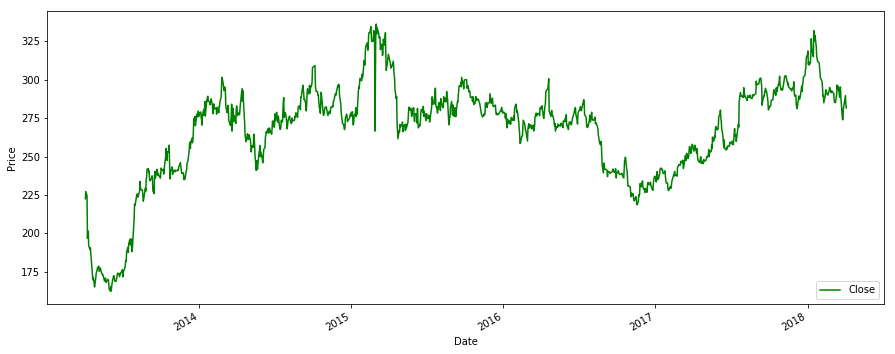

In [18]:
df['Close'].plot(figsize=(15,6), color="green")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [19]:
df.tail()

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close
Date,,,,,,,,,
2018-03-27,278.950012,280.799988,273.250000,274.049988,5339857.0,0.000276,-0.000176,0.0,274.049988
2018-03-28,274.000000,283.500000,273.000000,281.149994,5194922.0,0.000385,0.000261,0.0,281.149994
2018-04-02,281.149994,290.799988,278.799988,289.649994,2453933.0,0.000430,0.000302,0.0,289.649994
2018-04-03,287.299988,287.350006,283.049988,283.899994,1612729.0,0.000152,-0.000118,0.0,283.899994
2018-04-04,285.000000,286.500000,280.000000,281.600006,1634266.0,0.000232,-0.000119,0.0,281.600006


In [20]:
forecast_col = 'Close'

forecast_out = int(42)
# We will drop 12 columns because there are 12 holidays

In [21]:
df['label'] = df[forecast_col].shift(-forecast_out)
print(df.head(2))

              Open     High      Low   Adj Close     Volume    HL_PCT  \
Date                                                                    
2013-04-04  223.50  225.875  220.750  190.965378  3264100.0  0.000232   
2013-04-05  220.75  231.500  219.375  195.041260  3615068.0  0.000553   

            PCT_CHNG_OpCl  PCT_CHNG_CLOSE       Close       label  
Date                                                               
2013-04-04      -0.000043        0.001654  222.550003  165.000000  
2013-04-05       0.000297        0.001654  227.300003  167.449997  


In [22]:
X = np.array(df.drop(['label'], 1))

In [23]:
X = preprocessing.scale(X)

In [24]:
X_forecast_out = X[-forecast_out:]
X = X[:-forecast_out]

In [25]:
y = np.array(df['label'])
y = y[:-forecast_out]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [27]:
clf = LinearRegression()
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
print("Accuracy of our prediction model",clf.score(X_test, y_test)*100,"%")

Accuracy of our prediction model 55.296191686539586 %


In [29]:
# Taking first 30 values since 12 days are holidays

forecast_prediction = clf.predict(X_forecast_out)
print(forecast_prediction[:30])

[290.98148344 286.86781304 289.06058007 283.72486324 284.81948428
 282.56253008 280.47361565 280.91177751 282.12588765 281.45599612
 285.96070986 282.40235934 284.37986445 283.36226511 284.83433666
 285.09759027 287.46263764 284.06585022 284.00555973 285.77877554
 285.12283899 283.94889361 281.16018797 279.3624269  280.83378247
 279.75319048 281.9505717  283.91048586 285.67515326 280.30659325]


In [30]:
df['forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_prediction:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

In [31]:
df

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2013-04-04 00:00:00,223.500000,225.875000,220.750000,190.965378,3264100.0,0.000232,-0.000043,0.001654,222.550003,165.000000,NaN
2013-04-05 00:00:00,220.750000,231.500000,219.375000,195.041260,3615068.0,0.000553,0.000297,0.001654,227.300003,167.449997,NaN
2013-04-08 00:00:00,225.750000,228.000000,214.774994,192.552811,12271312.0,0.000616,-0.000060,0.001654,224.399994,171.625000,NaN
2013-04-09 00:00:00,203.500000,209.000000,195.125000,168.912750,14171642.0,0.000711,-0.000327,0.001654,196.850006,172.524994,NaN
2013-04-10 00:00:00,197.550003,202.399994,197.550003,172.581055,4875874.0,0.000246,0.000181,0.001654,201.125000,172.175003,NaN
2013-04-11 00:00:00,203.699997,204.000000,199.500000,172.881393,2561134.0,0.000226,-0.000109,0.001654,201.475006,170.000000,NaN
2013-04-12 00:00:00,194.949997,195.000000,189.524994,164.665268,7752650.0,0.000289,-0.000156,0.001654,191.899994,168.774994,NaN
2013-04-15 00:00:00,191.949997,196.324997,188.149994,162.648788,3153160.0,0.000434,-0.000125,0.001654,189.550003,169.024994,NaN
2013-04-16 00:00:00,189.250000,191.550003,188.350006,163.614151,1374018.0,0.000170,0.000075,0.001654,190.675003,170.600006,NaN


In [32]:
pred=df[-42:]

In [33]:
df=df[:-42]

In [34]:
pred

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2018-04-05 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290.981483
2018-04-06 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.867813
2018-04-07 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289.060580
2018-04-08 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283.724863
2018-04-09 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.819484
2018-04-10 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,282.562530
2018-04-11 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.473616
2018-04-12 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.911778
2018-04-13 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,282.125888


In [35]:
pred=pred.reset_index()

In [36]:
pred['Date']=pred['Date'].dt.date

In [37]:
pred.head(1)

,Date,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
0,2018-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290.981483


In [38]:
holidays=['2018-04-07','2018-04-08','2018-04-14','2018-04-15','2018-04-21','2018-04-22','2018-04-28','2018-04-29','2018-05-01','2018-05-05','2018-05-06','2018-05-12','2018-05-13']

In [39]:
pred['Date']=pred['Date'].apply(str)

In [40]:
for i in holidays:
    pred = pred.drop(pred[pred.Date==i].index)

In [41]:
pred['Date']=pd.to_datetime(pred['Date'])

In [42]:
pred.drop('forecast',axis=1,inplace=True)

In [43]:
pred.shape

(29, 11)

In [44]:
pred['forecast']=forecast_prediction[:29]

In [45]:
pred

,Date,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
0,2018-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290.981483
1,2018-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.867813
4,2018-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289.060580
5,2018-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283.724863
6,2018-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.819484
7,2018-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,282.562530
8,2018-04-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.473616
11,2018-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.911778
12,2018-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,282.125888
13,2018-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281.455996


In [46]:
pred.index=pred['Date']
pred.drop('Date',axis=1,inplace=True)

In [47]:
df=df.append(pred)

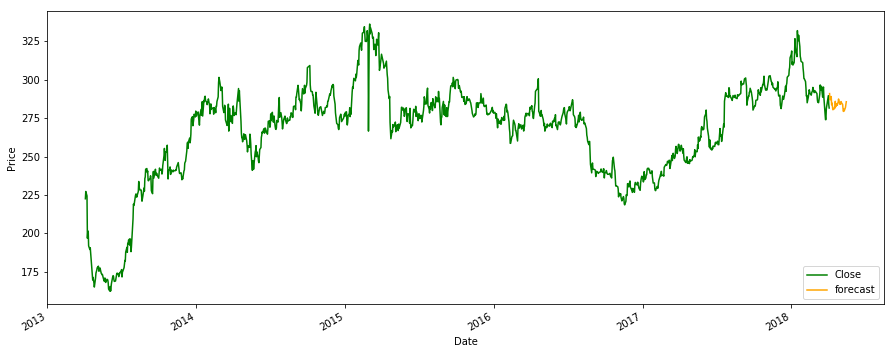

In [48]:
df['Close'].plot(figsize=(15,6), color="green")
df['forecast'].plot(figsize=(15,6), color="orange")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

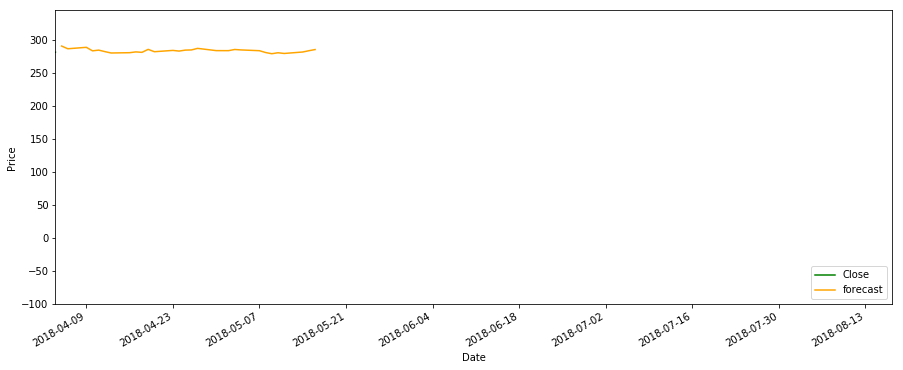

In [49]:
df['Close'].plot(figsize=(15,6), color="green")
df['forecast'].plot(figsize=(15,6), color="orange")
plt.xlim(xmin=datetime.date(2018, 4, 4))
plt.ylim(ymin=-100)
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [50]:
df.iloc[-1]

Open                     NaN
High                     NaN
Low                      NaN
Adj Close                NaN
Volume                   NaN
HL_PCT                   NaN
PCT_CHNG_OpCl            NaN
PCT_CHNG_CLOSE           NaN
Close                    NaN
label                    NaN
forecast          285.675153
Name: 2018-05-16 00:00:00, dtype: float64

In [51]:
close_last=df.iloc[-1].forecast

In [52]:
pred_return=close_last-close_zero
print("Predicted Return: Rs.",pred_return)

Predicted Return: Rs. 4.075147257034814


## Simple Moving Average (30,40,50)

In [53]:
# For 30 days
short_rolling = df.rolling(window=30).mean()
short_rolling.head(30)

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2013-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# For 40 days
med_rolling = df.rolling(window=40).mean()
med_rolling.tail(10)

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2018-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# For 50 days
long_rolling = df.rolling(window=50).mean()
long_rolling.tail(10)

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2018-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0,0.5,'Price in Rs.')

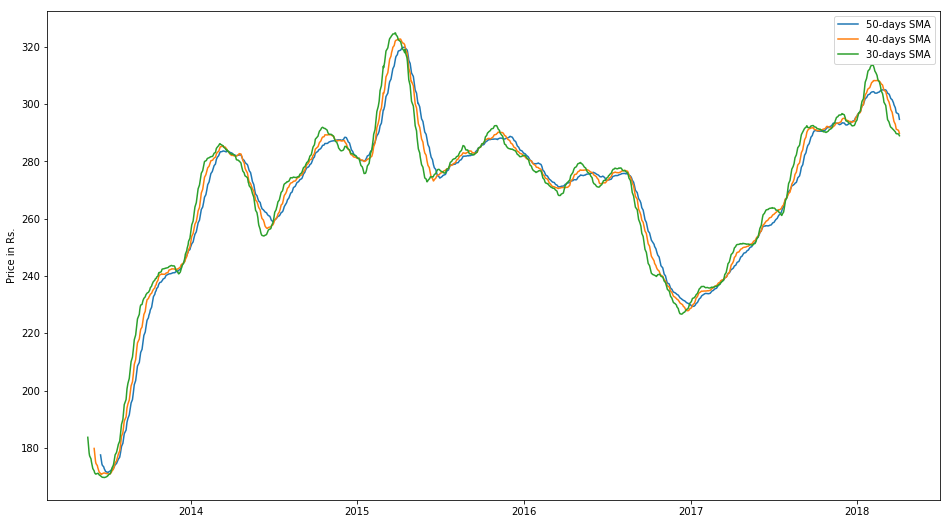

In [56]:
start_date = '2013-04-29'
end_date = '2018-04-04'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'Close'], label = '50-days SMA')
ax.plot(med_rolling.loc[start_date:end_date, :].index, med_rolling.loc[start_date:end_date, 'Close'], label = '40-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Close'], label = '30-days SMA')


ax.legend(loc='best')
ax.set_ylabel('Price in Rs.')


## Exponential Moving Average (30,40,50)

Text(0,0.5,'Price in Rs.')

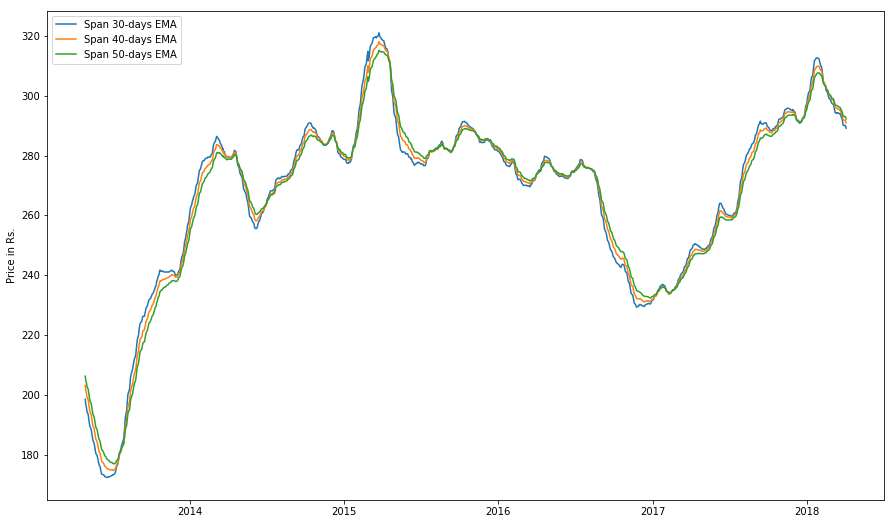

In [57]:
ema_short = df.ewm(span=30, adjust=False).mean()
ema_med = df.ewm(span=40, adjust=False).mean()
ema_long = df.ewm(span=50, adjust=False).mean()

fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'Close'], label = 'Span 30-days EMA')
ax.plot(ema_med.loc[start_date:end_date, :].index, ema_med.loc[start_date:end_date, 'Close'], label = 'Span 40-days EMA')
ax.plot(ema_long.loc[start_date:end_date, :].index, ema_long.loc[start_date:end_date, 'Close'], label = 'Span 50-days EMA')

ax.legend(loc='best')
ax.set_ylabel('Price in Rs.')

## Aroon Oscillator (30,40,50)

In [58]:
from pandas.stats import moments
from pandas import DataFrame

In [59]:
def aroon(s, n):
    up = 100 * moments.rolling_apply(s.High, n + 1, lambda x: x.argmax()) / n
    dn = 100 * moments.rolling_apply(s.Low, n + 1, lambda x: x.argmin()) / n

    return DataFrame(dict(up=up, down=dn))

In [60]:
ao30=aroon(df,30)
ao40=aroon(df,40)
ao50=aroon(df,50)

In [61]:
ao30

,down,up
Date,,
2013-04-04,NaN,NaN
2013-04-05,NaN,NaN
2013-04-08,NaN,NaN
2013-04-09,NaN,NaN
2013-04-10,NaN,NaN
2013-04-11,NaN,NaN
2013-04-12,NaN,NaN
2013-04-15,NaN,NaN
2013-04-16,NaN,NaN


Text(0,0.5,'Change in Price in Rs.')

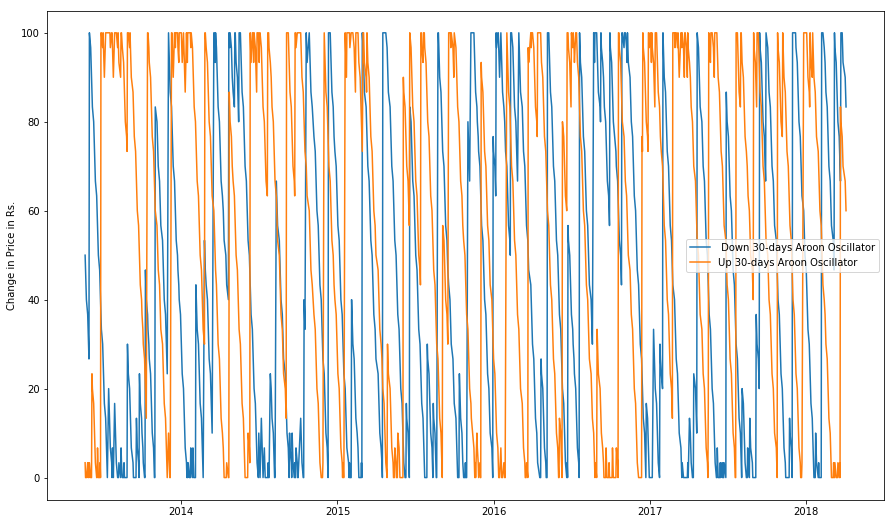

In [62]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ao30.loc[start_date:end_date, :].index, ao30.loc[start_date:end_date, 'down'], label = ' Down 30-days Aroon Oscillator')
ax.plot(ao30.loc[start_date:end_date, :].index, ao30.loc[start_date:end_date, 'up'], label = 'Up 30-days Aroon Oscillator')


ax.legend(loc='best')
ax.set_ylabel('Change in Price in Rs.')

Text(0,0.5,'Change in Price in Rs.')

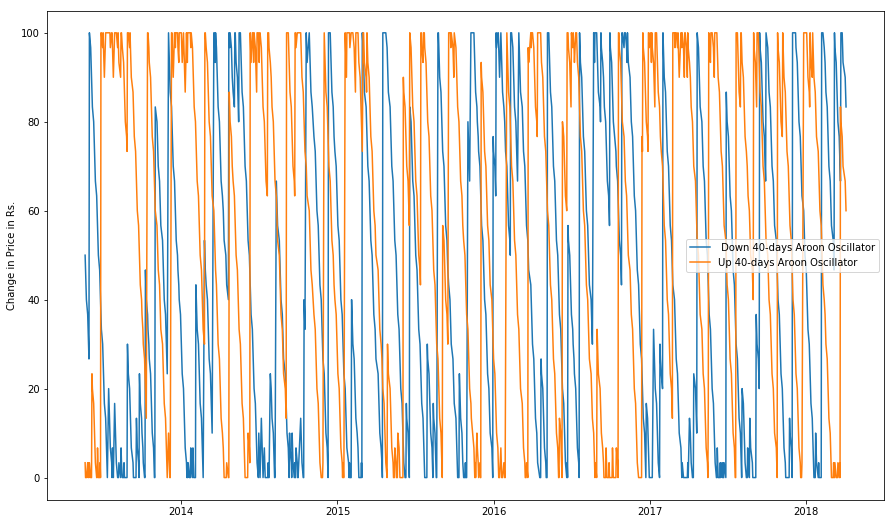

In [63]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ao30.loc[start_date:end_date, :].index, ao30.loc[start_date:end_date, 'down'], label = ' Down 40-days Aroon Oscillator')
ax.plot(ao30.loc[start_date:end_date, :].index, ao30.loc[start_date:end_date, 'up'], label = 'Up 40-days Aroon Oscillator')


ax.legend(loc='best')
ax.set_ylabel('Change in Price in Rs.')

Text(0,0.5,'Change in Price in Rs.')

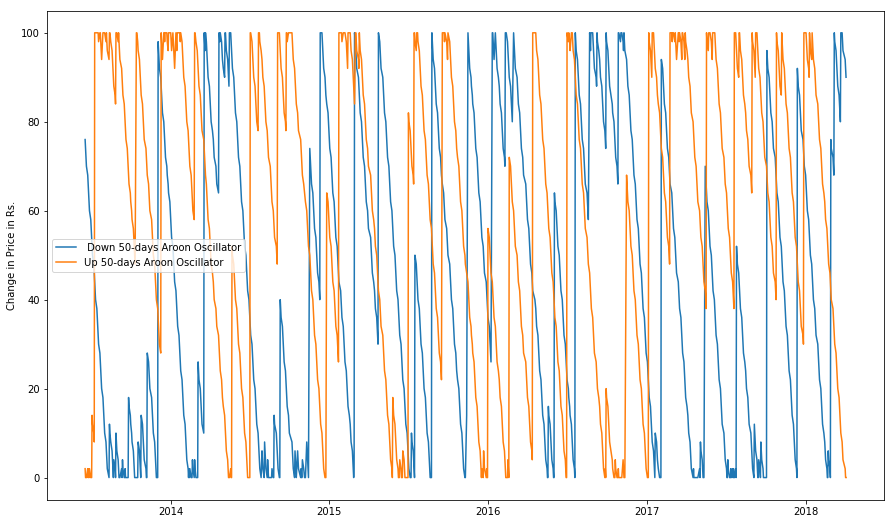

In [64]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ao50.loc[start_date:end_date, :].index, ao50.loc[start_date:end_date, 'down'], label = ' Down 50-days Aroon Oscillator')
ax.plot(ao50.loc[start_date:end_date, :].index, ao50.loc[start_date:end_date, 'up'], label = 'Up 50-days Aroon Oscillator')


ax.legend(loc='best')
ax.set_ylabel('Change in Price in Rs.')

## MACD Signal

In [65]:
def ema(s, n, wilder=False):
    span = n if not wilder else 2*n - 1
    return moments.ewma(s, span=span)


def macd(s, nfast=12, nslow=26, nsig=9, percent=True):
    fast, slow = ema(s, nfast), ema(s, nslow)

    if percent:
        macd = 100*(fast / slow - 1)
    else:
        macd = fast - slow

    sig = ema(macd, nsig)
    hist = macd - sig

    return DataFrame(dict(macd=macd, signal=sig, hist=hist,
                          fast=fast, slow=slow))

In [66]:
m=macd(df['Close'])

In [67]:
m.head(1)

,fast,hist,macd,signal,slow
Date,,,,,
2013-04-04,222.550003,0.0,0.0,0.0,222.550003


Text(0,0.5,'Change ')

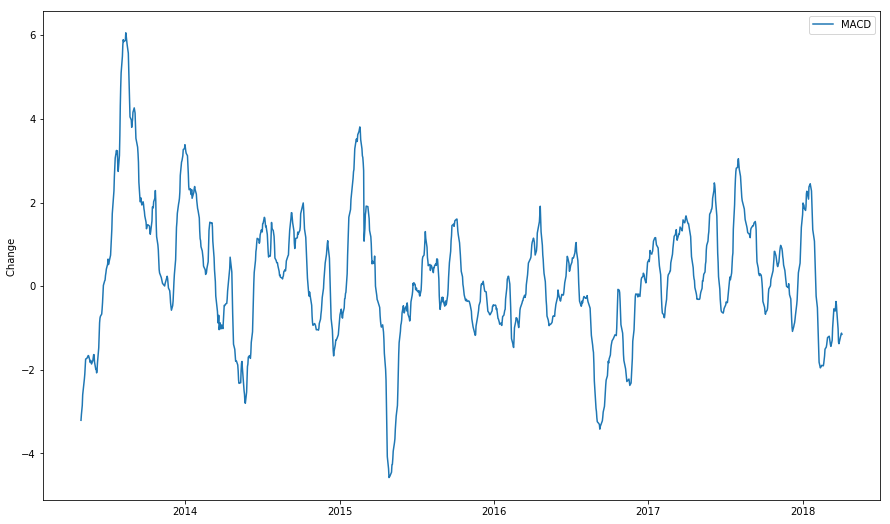

In [68]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(m.loc[start_date:end_date, :].index, m.loc[start_date:end_date, 'macd'], label = 'MACD')

ax.legend(loc='best')
ax.set_ylabel('Change ')

## Relative Strength Index (RSI)

In [69]:
def rsi(s, n=14):
    diff = s.diff()
    which_dn = diff < 0

    up, dn = diff, diff*0
    up[which_dn], dn[which_dn] = 0, -up[which_dn]

    emaup = ema(up, n, wilder=True)
    emadn = ema(dn, n, wilder=True)

    return 100 * emaup/(emaup + emadn)

In [70]:
sf=rsi(df['Close'],50)

In [71]:
sfd=pd.DataFrame({'Date':sf.index, 'RSI':sf.values})

In [72]:
sfd.index=sfd['Date']

Text(0,0.5,'Change')

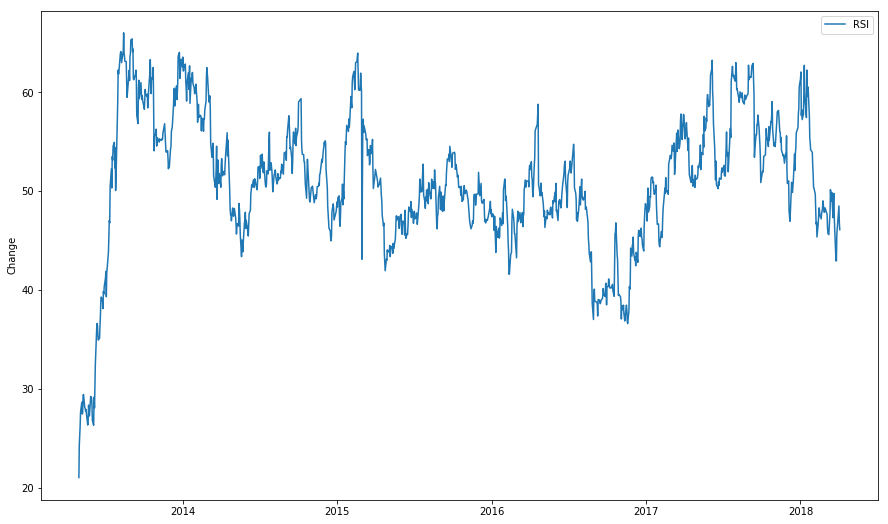

In [73]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(sfd.loc[start_date:end_date, :].index, sfd.loc[start_date:end_date, 'RSI'], label = 'RSI')

ax.legend(loc='best')
ax.set_ylabel('Change')

## Bollinger Bands (30,40,50)

In [74]:
price=df["Close"]

def bbands(price, length=30, numsd=2):
    """ returns average, upper band, and lower band"""
    ave = pd.stats.moments.rolling_mean(price,length)
    sd = pd.stats.moments.rolling_std(price,length)
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)

df['ave30'], df['upper30'], df['lower30'] = bbands(df.Close, length=30, numsd=1)
df['ave40'], df['upper40'], df['lower40'] = bbands(df.Close, length=40, numsd=1)
df['ave50'], df['upper50'], df['lower50'] = bbands(df.Close, length=50, numsd=1)

Text(0,0.5,'Change')

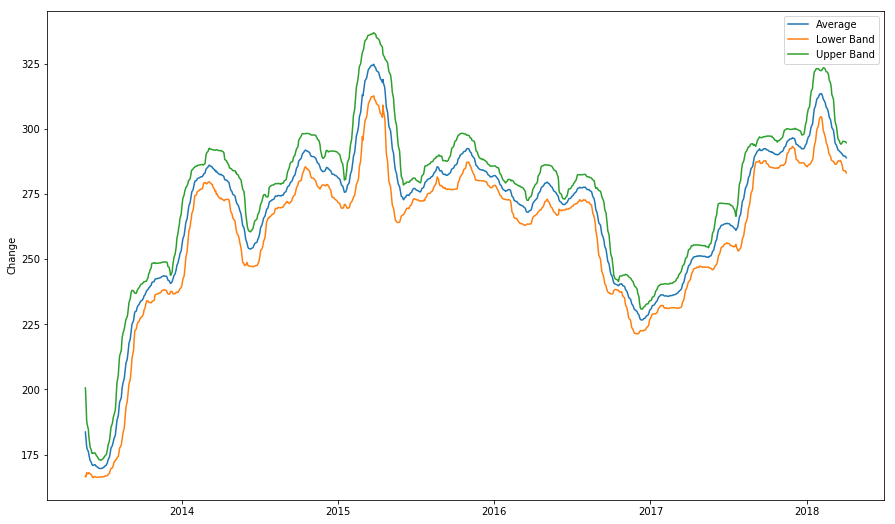

In [75]:
# For 30 days
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'ave30'], label = 'Average')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'lower30'], label = 'Lower Band')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'upper30'], label = 'Upper Band')

ax.legend(loc='best')
ax.set_ylabel('Change')

Text(0,0.5,'Change')

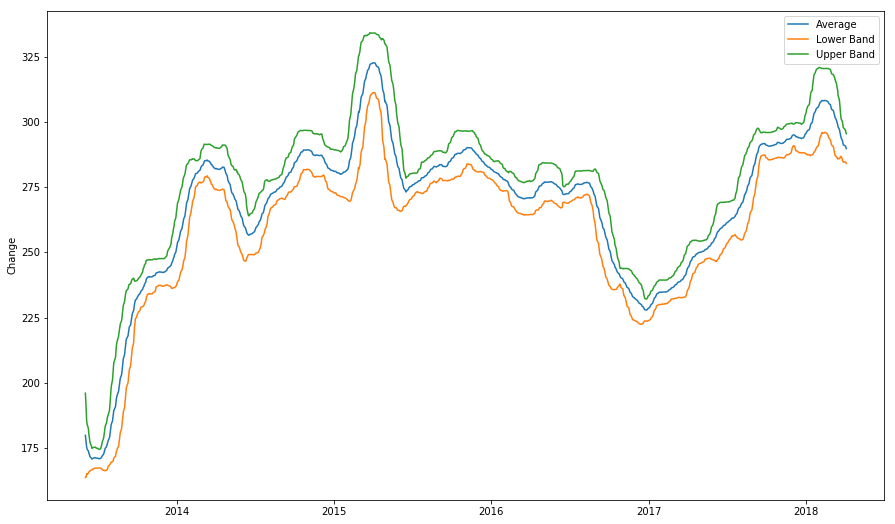

In [76]:
# For 40 days
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'ave40'], label = 'Average')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'lower40'], label = 'Lower Band')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'upper40'], label = 'Upper Band')

ax.legend(loc='best')
ax.set_ylabel('Change')

Text(0,0.5,'Change')

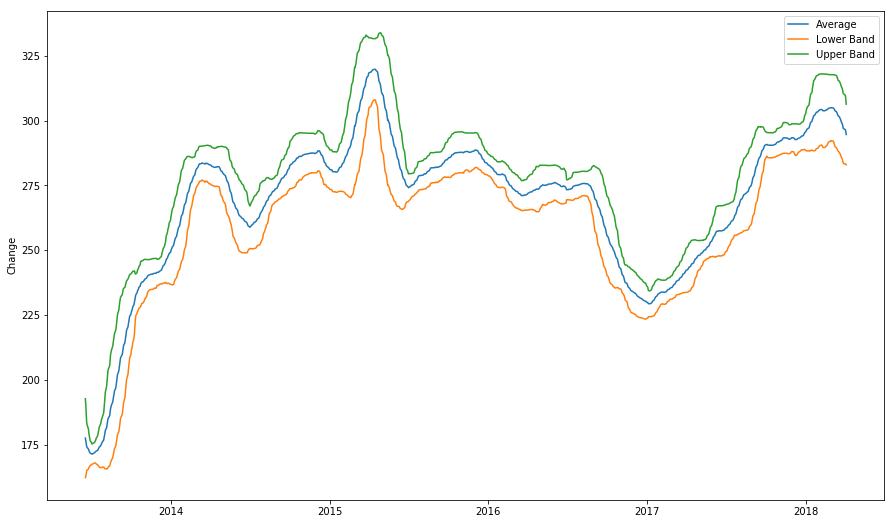

In [77]:
# For 50 days
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'ave50'], label = 'Average')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'lower50'], label = 'Lower Band')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'upper50'], label = 'Upper Band')

ax.legend(loc='best')
ax.set_ylabel('Change')

## Stochastic Oscillator

In [78]:
def STOK(close, low, high, n): 
 STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
 return STOK

def STOD(close, low, high, n):
 STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
 STOD = pd.rolling_mean(STOK, 3)
 return STOD

In [79]:
df['%K'] = STOK(df['Close'], df['Low'], df['High'], 14)
df['%D'] = STOD(df['Close'], df['Low'], df['High'], 14)

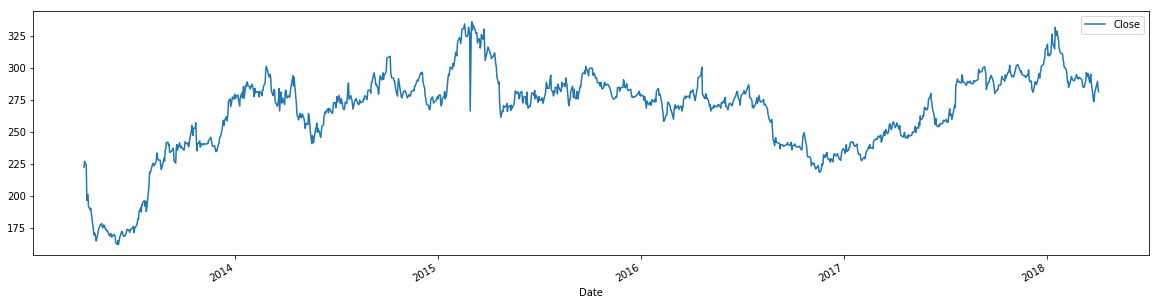

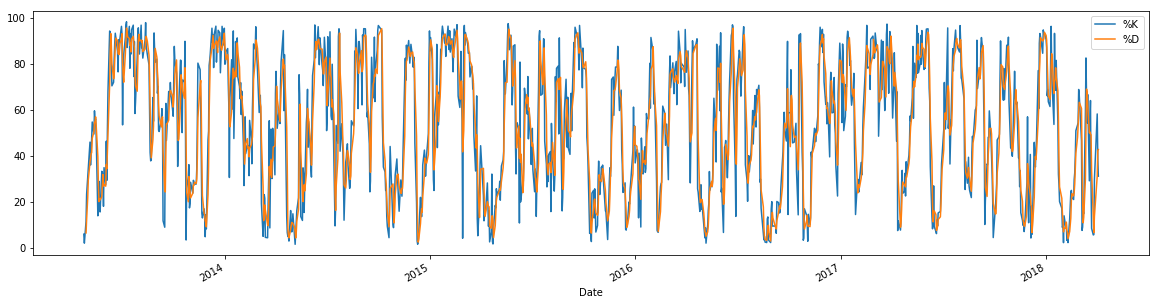

In [80]:
df.plot(y=['Close'], figsize = (20, 5))
df.plot(y=['%K', '%D'], figsize = (20, 5))

## Chande Oscillator

In [81]:
def avg_true_range(df): 
  ind = range(0,len(df))
  indexlist = list(ind)
  df.index = indexlist

  for index, row in df.iterrows():
    if index != 0:
      tr1 = row["High"] - row["Low"]
      tr2 = abs(row["High"] - df.iloc[index-1]["Close"])
      tr3 = abs(row["Low"] - df.iloc[index-1]["Close"])

      true_range = max(tr1, tr2, tr3)
      df.set_value(index,"True Range", true_range)

  df["Avg TR"] = df["True Range"].rolling(min_periods=14, window=14, center=False).mean()
  return df

In [82]:
def chandelier_exit(df):

  df_tr = avg_true_range(df)

  df_tr['rolling_high']= df_tr["High"]
  df_tr['rolling_low'] = df_tr["Low"]

  df_tr['chandelier_long'] = df_tr['rolling_high'] - df_tr["Avg TR"] * 3
  df_tr['chandelier_short'] = df_tr['rolling_low'] - df_tr["Avg TR"] * 3
  fig, ax = plt.subplots(figsize=(15,9))

  ax.plot(df_tr['Date'], df_tr['chandelier_long'], label = 'Chand Long')

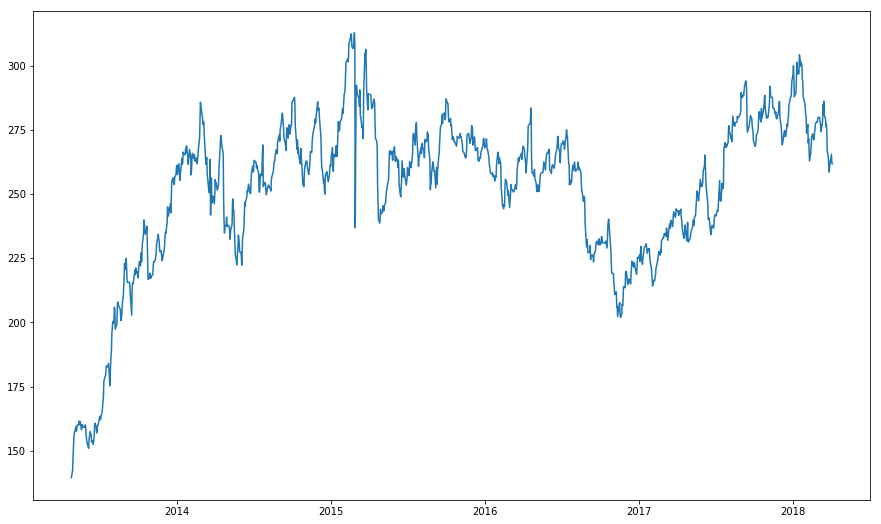

In [83]:
ch=chandelier_exit(df1)

## Commodity Channel Index (30,40,50)

In [84]:
def CCI(data, ndays): 
 TP = (data['High'] + data['Low'] + data['Close']) / 3 
 CCI = pd.Series((TP - pd.rolling_mean(TP, ndays)) / (0.015 * pd.rolling_std(TP, ndays)),
 name = 'CCI')
 data=data.join(CCI)
 return data

In [85]:
cci30=CCI(df,30)
cci40=CCI(df,40)
cci50=CCI(df,50)

In [86]:
cci30

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,...,lower30,ave40,upper40,lower40,ave50,upper50,lower50,%K,%D,CCI
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-04,223.500000,225.875000,220.750000,190.965378,3264100.0,0.000232,-0.000043,0.001654,222.550003,165.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-05,220.750000,231.500000,219.375000,195.041260,3615068.0,0.000553,0.000297,0.001654,227.300003,167.449997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-08,225.750000,228.000000,214.774994,192.552811,12271312.0,0.000616,-0.000060,0.001654,224.399994,171.625000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-09,203.500000,209.000000,195.125000,168.912750,14171642.0,0.000711,-0.000327,0.001654,196.850006,172.524994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-10,197.550003,202.399994,197.550003,172.581055,4875874.0,0.000246,0.000181,0.001654,201.125000,172.175003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-11,203.699997,204.000000,199.500000,172.881393,2561134.0,0.000226,-0.000109,0.001654,201.475006,170.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-12,194.949997,195.000000,189.524994,164.665268,7752650.0,0.000289,-0.000156,0.001654,191.899994,168.774994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-15,191.949997,196.324997,188.149994,162.648788,3153160.0,0.000434,-0.000125,0.001654,189.550003,169.024994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-16,189.250000,191.550003,188.350006,163.614151,1374018.0,0.000170,0.000075,0.001654,190.675003,170.600006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0,0.5,'Change')

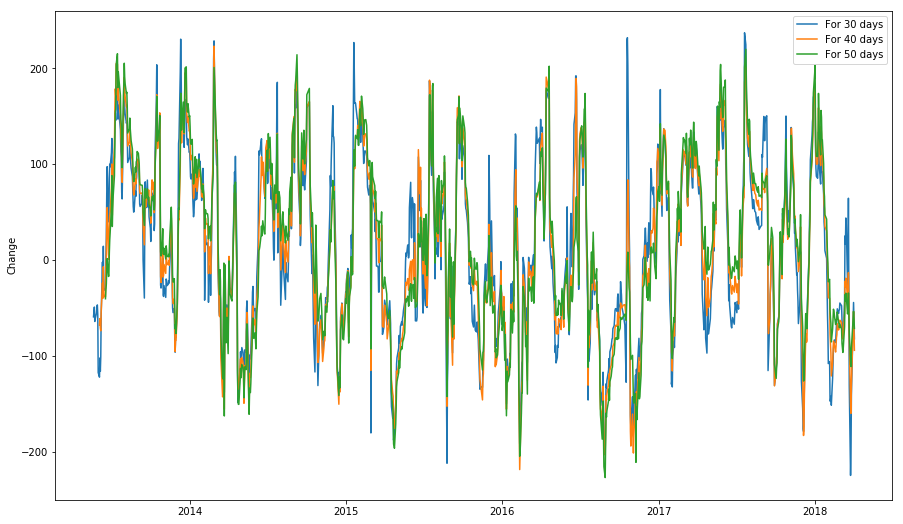

In [87]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(cci30.loc[start_date:end_date, :].index, cci30.loc[start_date:end_date, 'CCI'], label = 'For 30 days')
ax.plot(cci40.loc[start_date:end_date, :].index, cci40.loc[start_date:end_date, 'CCI'], label = 'For 40 days')
ax.plot(cci50.loc[start_date:end_date, :].index, cci50.loc[start_date:end_date, 'CCI'], label = 'For 50 days')

ax.legend(loc='best')
ax.set_ylabel('Change')

## Chakin Volatility Indicator (30,40,50)

In [88]:
def chaikin_oscillator(data, periods_short=3, periods_long=30, high_col='High',
                       low_col='Low', close_col='Close', vol_col='Volume'):
    ac = pd.Series([])

    for index, row in data.iterrows():
        if row[high_col] != row[low_col]:
            val = ((row[close_col] - row[low_col]) - (row[high_col] - row[close_col])) / (row[high_col] - row[low_col]) * row[vol_col]
        else:
            val = 0
        ac.set_value(index, val)

    ema_long = ac.ewm(ignore_na=False, min_periods=0, com=periods_long, adjust=True).mean()
    ema_short = ac.ewm(ignore_na=False, min_periods=0, com=periods_short, adjust=True).mean()
    data['ch_osc'] = ema_short - ema_long

    return data

In [89]:
ch30=chaikin_oscillator(df,3,30)
ch40=chaikin_oscillator(df,3,40)
ch50=chaikin_oscillator(df,3,50)

Text(0,0.5,'Change')

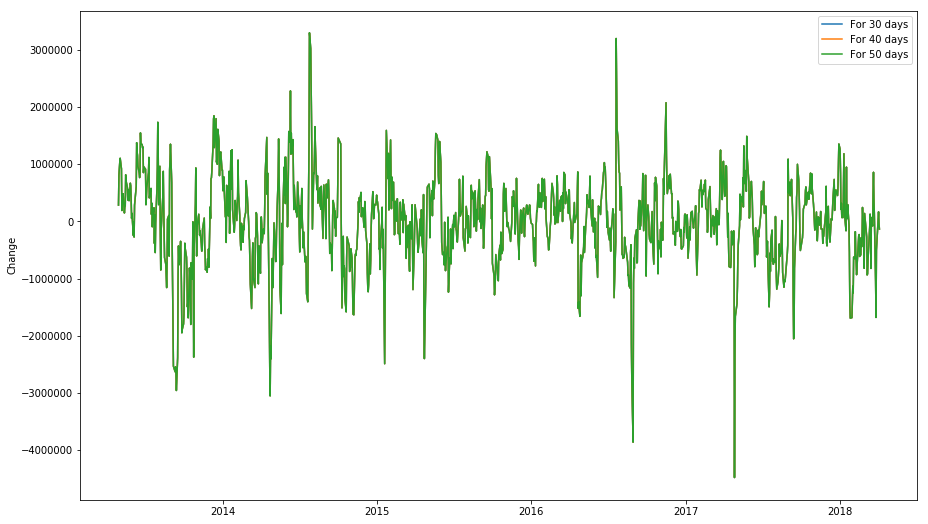

In [90]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ch30.loc[start_date:end_date, :].index, ch30.loc[start_date:end_date, 'ch_osc'], label = 'For 30 days')
ax.plot(ch40.loc[start_date:end_date, :].index, ch40.loc[start_date:end_date, 'ch_osc'], label = 'For 40 days')
ax.plot(ch50.loc[start_date:end_date, :].index, ch50.loc[start_date:end_date, 'ch_osc'], label = 'For 50 days')

ax.legend(loc='best')
ax.set_ylabel('Change')

#overlapped each other

## Rate of Price Change (30,40,50)

In [91]:
def ROC(data,n):
 N = data['Close'].diff(n)
 D = data['Close'].shift(n)
 ROC = pd.Series(N/D,name='ROC')
 data = data.join(ROC)
 return data 

In [92]:
roc30=ROC(df,30)
roc40=ROC(df,40)
roc50=ROC(df,50)

In [93]:
roc30

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,...,ave40,upper40,lower40,ave50,upper50,lower50,%K,%D,ch_osc,ROC
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-04,223.500000,225.875000,220.750000,190.965378,3264100.0,0.000232,-0.000043,0.001654,222.550003,165.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN
2013-04-05,220.750000,231.500000,219.375000,195.041260,3615068.0,0.000553,0.000297,0.001654,227.300003,167.449997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.383991e+05,NaN
2013-04-08,225.750000,228.000000,214.774994,192.552811,12271312.0,0.000616,-0.000060,0.001654,224.399994,171.625000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.881479e+05,NaN
2013-04-09,203.500000,209.000000,195.125000,168.912750,14171642.0,0.000711,-0.000327,0.001654,196.850006,172.524994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.908988e+05,NaN
2013-04-10,197.550003,202.399994,197.550003,172.581055,4875874.0,0.000246,0.000181,0.001654,201.125000,172.175003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.344535e+05,NaN
2013-04-11,203.699997,204.000000,199.500000,172.881393,2561134.0,0.000226,-0.000109,0.001654,201.475006,170.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.336322e+05,NaN
2013-04-12,194.949997,195.000000,189.524994,164.665268,7752650.0,0.000289,-0.000156,0.001654,191.899994,168.774994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.670149e+05,NaN
2013-04-15,191.949997,196.324997,188.149994,162.648788,3153160.0,0.000434,-0.000125,0.001654,189.550003,169.024994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.354348e+05,NaN
2013-04-16,189.250000,191.550003,188.350006,163.614151,1374018.0,0.000170,0.000075,0.001654,190.675003,170.600006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.399663e+04,NaN


Text(0,0.5,'Change')

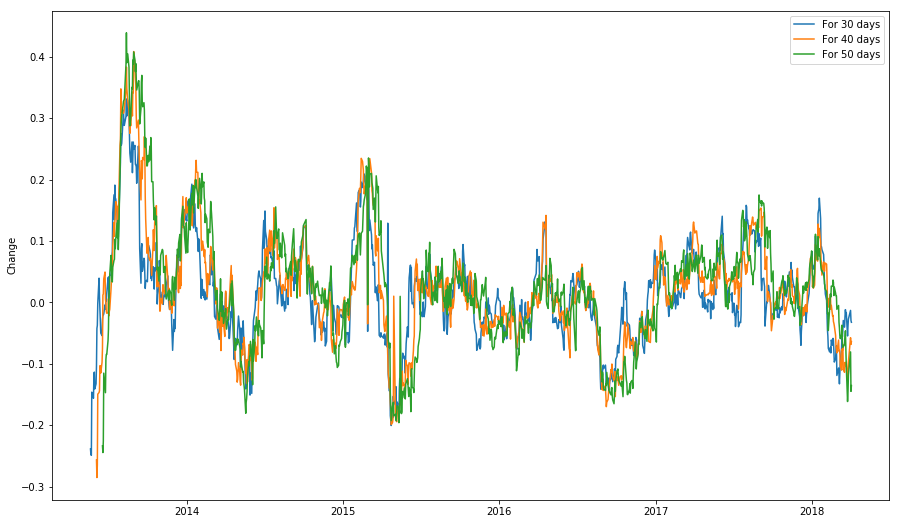

In [94]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(roc30.loc[start_date:end_date, :].index, roc30.loc[start_date:end_date, 'ROC'], label = 'For 30 days')
ax.plot(roc40.loc[start_date:end_date, :].index, roc40.loc[start_date:end_date, 'ROC'], label = 'For 40 days')
ax.plot(roc50.loc[start_date:end_date, :].index, roc50.loc[start_date:end_date, 'ROC'], label = 'For 50 days')

ax.legend(loc='best')
ax.set_ylabel('Change')

## Rate of Volume Change (30,40,50)


In [95]:
def ROC(data,n):
 N = data['Volume'].diff(n)
 D = data['Volume'].shift(n)
 ROC = pd.Series(N/D,name='ROC')
 data = data.join(ROC)
 return data 

In [96]:
roc30=ROC(df,30)
roc40=ROC(df,40)
roc50=ROC(df,50)

In [97]:
roc30

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,...,ave40,upper40,lower40,ave50,upper50,lower50,%K,%D,ch_osc,ROC
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-04,223.500000,225.875000,220.750000,190.965378,3264100.0,0.000232,-0.000043,0.001654,222.550003,165.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN
2013-04-05,220.750000,231.500000,219.375000,195.041260,3615068.0,0.000553,0.000297,0.001654,227.300003,167.449997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.383991e+05,NaN
2013-04-08,225.750000,228.000000,214.774994,192.552811,12271312.0,0.000616,-0.000060,0.001654,224.399994,171.625000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.881479e+05,NaN
2013-04-09,203.500000,209.000000,195.125000,168.912750,14171642.0,0.000711,-0.000327,0.001654,196.850006,172.524994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.908988e+05,NaN
2013-04-10,197.550003,202.399994,197.550003,172.581055,4875874.0,0.000246,0.000181,0.001654,201.125000,172.175003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.344535e+05,NaN
2013-04-11,203.699997,204.000000,199.500000,172.881393,2561134.0,0.000226,-0.000109,0.001654,201.475006,170.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.336322e+05,NaN
2013-04-12,194.949997,195.000000,189.524994,164.665268,7752650.0,0.000289,-0.000156,0.001654,191.899994,168.774994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.670149e+05,NaN
2013-04-15,191.949997,196.324997,188.149994,162.648788,3153160.0,0.000434,-0.000125,0.001654,189.550003,169.024994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.354348e+05,NaN
2013-04-16,189.250000,191.550003,188.350006,163.614151,1374018.0,0.000170,0.000075,0.001654,190.675003,170.600006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.399663e+04,NaN


Text(0,0.5,'Change')

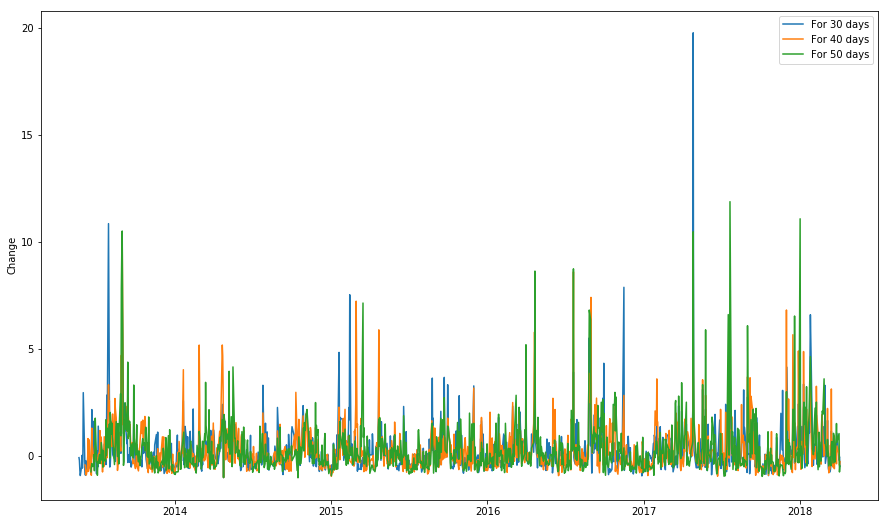

In [98]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(roc30.loc[start_date:end_date, :].index, roc30.loc[start_date:end_date, 'ROC'], label = 'For 30 days')
ax.plot(roc40.loc[start_date:end_date, :].index, roc40.loc[start_date:end_date, 'ROC'], label = 'For 40 days')
ax.plot(roc50.loc[start_date:end_date, :].index, roc50.loc[start_date:end_date, 'ROC'], label = 'For 50 days')

ax.legend(loc='best')
ax.set_ylabel('Change')